In [77]:
import pandas as pd
import numpy as np
from datetime import timedelta
import plotly.express as px
import plotly.graph_objects as go
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly as py
import statsmodels
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
merge_data = pd.read_excel('merge_data.xlsx', index_col=0)

In [294]:
merge_data['month_year'] = pd.to_datetime(merge_data['end_of_week']).dt.to_period('M')

In [295]:
merge_data.head()

,SKU,Platform,Region,start_of_week,end_of_week,average_price,consumption,acv,year,month_year
0,34 KH Orig Dnr 32pk 7343507032,Dinner roll,"Albany, NY",2015-01-05,2015-01-11,0.000000,0,0,2015,2015-01
1,22 KH Orig Dnr 24pk 7343500230,Dinner roll,"Albany, NY",2015-01-05,2015-01-11,4.605175,739,21,2015,2015-01
2,29 KH Svry Btr Dnr 24pk 7343500233,Dinner roll,"Albany, NY",2015-01-05,2015-01-11,4.480000,37,9,2015,2015-01
3,31 KH Orig Dnr 18pk 7343507018,Dinner roll,"Albany, NY",2015-01-05,2015-01-11,3.480000,75,9,2015,2015-01
4,19 KH Orig Dnr 12pk 7343500004,Dinner roll,"Albany, NY",2015-01-05,2015-01-11,3.143336,232,32,2015,2015-01


# ACV vs. consumption

In [88]:
plt.style.use("ggplot")

In [397]:
dinner_roll = merge_data.loc[merge_data['Platform'] == 'Dinner roll', ['Platform','acv', 'consumption']]
sandwich = merge_data.loc[merge_data['Platform'] == 'Sandwich' , ['acv', 'consumption']]
bread = merge_data.loc[merge_data['Platform'] == 'Bread', ['acv', 'consumption']]

<AxesSubplot:title={'center':'Dinner roll: ACV vs. Consumption'}, xlabel='acv', ylabel='consumption'>

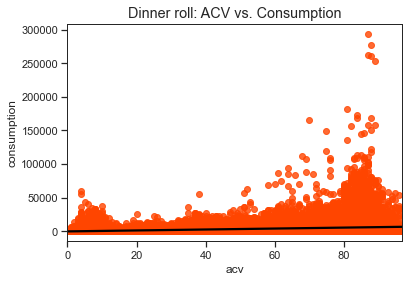

In [400]:
plt.title('Dinner roll: ACV vs. Consumption')
sns.regplot(data = dinner_roll,x = 'acv',
               y = 'consumption', fit_reg=True,scatter_kws={'color': 'orangered'},
            line_kws={'color': 'black'})

<AxesSubplot:title={'center':'Sandwich: ACV vs. Consumption'}, xlabel='acv', ylabel='consumption'>

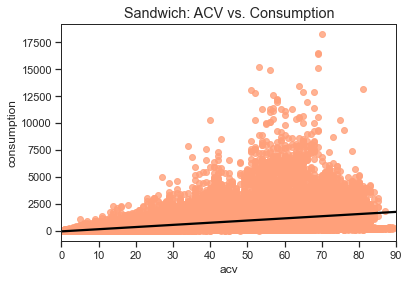

In [401]:
plt.title('Sandwich: ACV vs. Consumption')
sns.regplot(data = sandwich,
            x = 'acv',
            y = 'consumption' ,
            fit_reg=True,
            scatter_kws={'color': 'lightsalmon'},
            line_kws={'color': 'black'})

<AxesSubplot:title={'center':'Bread: ACV vs. Consumption'}, xlabel='acv', ylabel='consumption'>

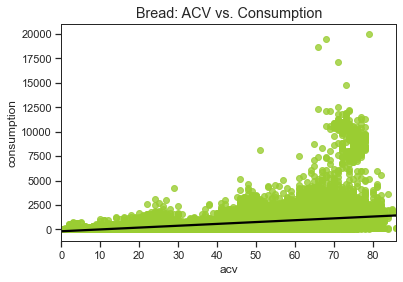

In [403]:
plt.title('Bread: ACV vs. Consumption')
sns.regplot(data = bread,
            x = 'acv',
            y = 'consumption',
            fit_reg=True,
            scatter_kws={'color': 'yellowgreen'},
            line_kws={'color': 'black'} )


# Price vs. Consumption

In [405]:
dinner_roll = merge_data.loc[merge_data['Platform'] == 'Dinner roll', ['average_price', 'consumption']]
sandwich = merge_data.loc[merge_data['Platform'] == 'Sandwich', ['average_price', 'consumption']]
bread = merge_data.loc[merge_data['Platform'] == 'Bread', ['average_price', 'consumption']]

<AxesSubplot:title={'center':'Dinner roll: price vs. Consumption'}, xlabel='average_price', ylabel='consumption'>

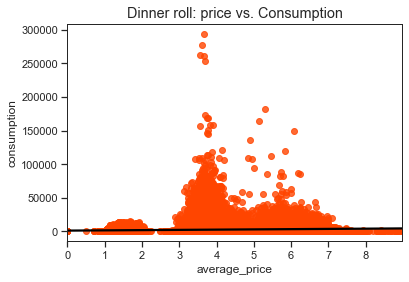

In [406]:
plt.title('Dinner roll: price vs. Consumption')
sns.regplot(data = dinner_roll,
               x = 'average_price',
               y = 'consumption',
               fit_reg=True,scatter_kws={'color': 'orangered'},
               line_kws={'color': 'black'})

<AxesSubplot:title={'center':'Sandwich: Price vs. Consumption'}, xlabel='average_price', ylabel='consumption'>

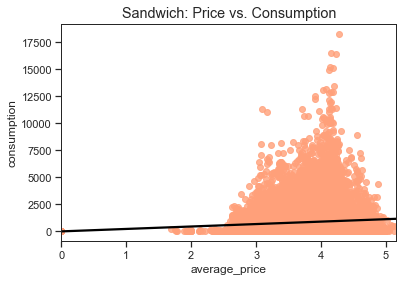

In [407]:
plt.title('Sandwich: Price vs. Consumption')
sns.regplot(data = sandwich,
               x = 'average_price',
               y = 'consumption',
               fit_reg=True,
               scatter_kws={'color': 'lightsalmon'},
              line_kws={'color': 'black'})

<AxesSubplot:title={'center':'Bread: Price vs. Consumption'}, xlabel='average_price', ylabel='consumption'>

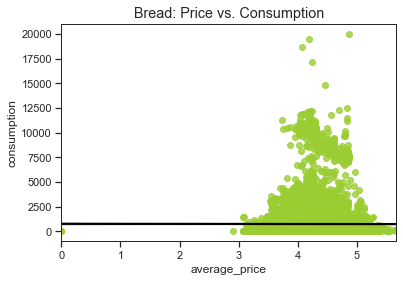

In [408]:
plt.title('Bread: Price vs. Consumption')

sns.regplot(data = bread,
               x = 'average_price',
               y = 'consumption',
               fit_reg=True,
               scatter_kws={'color': 'yellowgreen'},
               line_kws={'color': 'black'})

# By platform

In [337]:
colors = ['green', 'orangered', 'lightsalmon']

platform = merge_data.groupby('Platform').\
        agg({'consumption': 'sum'}).reset_index()

fig = go.Figure(data=[go.Pie(labels=platform['Platform'], values=platform['consumption'],
                             marker_colors=colors,
                             textinfo='label+percent',
                             hole=.4
                            )])
fig.update_layout(
    title='Consumption by platform')
fig.show()

# By SKU

In [396]:
colors = ['orangered',] * 15
colors[5] = 'lightsalmon'
colors[8] = 'lightsalmon'
colors[11] = 'lightsalmon'
colors[14] = 'lightsalmon'
colors[6] = 'green'
colors[10] = 'green'


sku_consumption = merge_data.groupby(['Platform','SKU']).\
    agg({'consumption': 'sum'}).\
    sort_values('consumption', ascending = False).\
    reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=sku_consumption['SKU'], 
    y= sku_consumption['consumption'],
    text=sku_consumption['consumption'],
    marker_color = colors
))

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside',
                 textfont_size =10)

fig.update_layout(
    title='Consumption by SKU',
    xaxis_tickfont_size=11,
    yaxis=dict(
        title='Consumption',
        titlefont_size=16,
            tickfont_size=12
    ),
    xaxis_tickangle=40,
    barmode='group',
    bargap=0.08, 
    bargroupgap=0.1,
    plot_bgcolor='white'
)

fig.show()

# By region

In [395]:
region = merge_data.groupby('Region').\
        agg({'consumption': 'sum'}).\
        reset_index().\
        sort_values('consumption', ascending = False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=region['Region'],
    y=region['consumption'],
    marker={'color': region['consumption'],'colorscale': 'Oryel'}))


fig.update_layout(title='Consumption by region',
                  xaxis_tickfont_size=9,
                  yaxis=dict(title='Total consumption',
                             titlefont_size=16,
                             tickfont_size=12),
                  barmode='group', 
                  bargap=0.30,
                  xaxis_tickangle=40,
                  plot_bgcolor='white')
fig.show()


# Trend by consumption

In [335]:
trend = merge_data.groupby(['end_of_week','Platform']).\
        agg({'consumption': 'sum'}).\
        reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Dinner roll', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Dinner roll', 'consumption'],
                    mode='lines',
                    name='Dinner roll',
                    marker_color = 'orangered'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Sandwich', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Sandwich', 'consumption'],
                    mode='lines',
                    name='Sandwich',
                    marker_color = 'lightsalmon'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Bread', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Bread', 'consumption'],
                    mode='lines',
                    name='Bread',
                    marker_color = 'green'))

fig.update_layout(title='Trend by consumption',
                  template = 'simple_white',
                  xaxis_tickfont_size=9,
                  yaxis=dict(title='Consumption',
                             titlefont_size=16,
                             tickfont_size=12),
                  plot_bgcolor='white')

fig.show()

# Trend by ACV

In [327]:
trend = merge_data.groupby(['end_of_week','Platform']).\
        agg({'acv': 'mean'}).\
        reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Dinner roll', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Dinner roll', 'acv'],
                    mode='lines',
                    marker_color = 'orangered',
                    name='Dinner roll'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Sandwich', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Sandwich', 'acv'],
                    mode='lines',
                    name='Sandwich',
                    marker_color= 'lightsalmon'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Bread', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Bread', 'acv'],
                    mode='lines',
                    name='Bread'))

fig.update_layout(title='Trend by ACV',
                  template = 'simple_white',
                  xaxis_tickfont_size=9,
                  yaxis=dict(title='ACV',
                             titlefont_size=16,
                             tickfont_size=12),
                  plot_bgcolor='white')

fig.show()

# Trend by Average Price

In [329]:
trend = merge_data.groupby(['end_of_week','Platform']).\
        agg({'average_price': 'mean'}).\
        reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Dinner roll', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Dinner roll', 'average_price'],
                    mode='lines',
                    name='Dinner roll',
                    marker_color = 'orangered'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Sandwich', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Sandwich', 'average_price'],
                    mode='lines',
                    name='Sandwich',
                    marker_color = 'lightsalmon'))

fig.add_trace(go.Scatter(x=trend.loc[trend['Platform'] == 'Bread', 'end_of_week'], 
                         y=trend.loc[trend['Platform'] == 'Bread', 'average_price'],
                    mode='lines',
                    name='Bread'))

fig.update_layout(title='Trend by Average price',
                  template = 'simple_white',
                  xaxis_tickfont_size=9,
                  yaxis=dict(title='Average price',
                             titlefont_size=16,
                             tickfont_size=12))

fig.show()